In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
from scipy.optimize import minimize

### Для функции одной переменной

In [2]:
def f(x):
    return 3*pow(x,2)

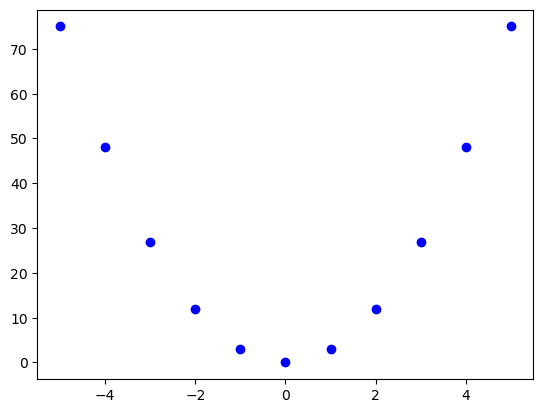

In [3]:
for x in range(-5,6):
    #plt.scatter(x, f(x))
    plt.plot(x, f(x),  '--bo')

In [4]:
def dif(x):
    return 6*x

In [5]:
def gradient_descent(x_0, lam): 
    res_x = []
    res_y = []
    res = []
    while True:
        res_x.append(x_0)
        res_y.append(f(x_0))
        res.append([x_0, f(x_0)])
        x_1 = x_0 - lam * dif(x_0)
        if np.linalg.norm(x_1 - x_0) < 0.00000001:
            break
        x_0 = x_1
    return(res_y, res_x, res)

In [6]:
x_nachalnoe = 8
lamda = 0.1
result_y, result_x, result = gradient_descent(x_nachalnoe, lamda)

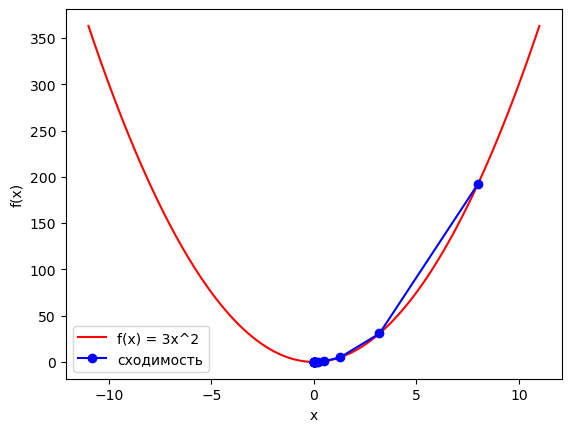

In [7]:
x = np.linspace(-11, 11, 100)
y = f(x)

plt.figure()
plt.plot(x, y, label='f(x) = 3x^2', color='r')
plt.plot(result_x, result_y, color='b', marker='o', label='сходимость')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Для функции двух переменных

In [8]:
def f(x, y):
    return 3*pow(x,2) + 5*pow(y,2)

In [9]:
def diff(x, y):
    return np.array([6 * x, 10 * y])

In [10]:
fig1 = go.Figure()

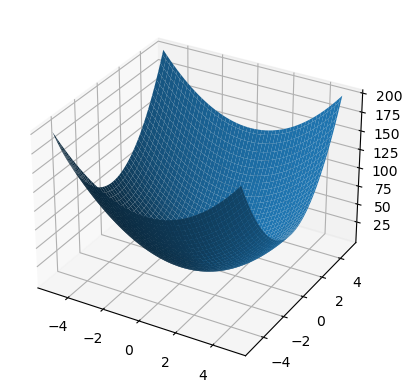

In [11]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
F = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, F)

In [12]:
def gradient_descent_2(x_0, y_0, lam): 
    res = []
    res_x = []
    res_y = []
    res_z = []
    while True:
        res_x.append(x_0)
        res_y.append(y_0)
        res_z.append(f(x_0, y_0))
        x_1 = x_0 - lam * diff(x_0, y_0)[0]
        y_1 = y_0 - lam * diff(x_0, y_0)[1]
        if (np.linalg.norm(x_1 - x_0) < 0.00000001) and (np.linalg.norm(y_1 - y_0) < 0.00000001):
            break
        x_0 = x_1
        y_0 = y_1
    return(res_x, res_y, res_z)

In [13]:
x_0 = 5
y_0 = 10
lam = 0.1
result_x, result_y, result_z = gradient_descent_2(x_0, y_0, lam)

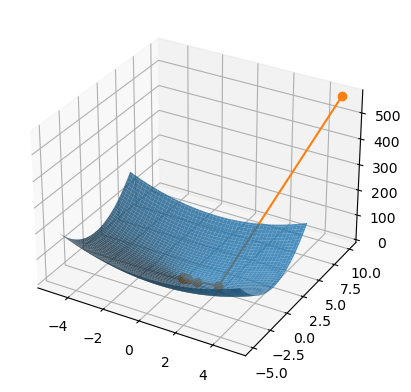

In [14]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
F = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, F, alpha=0.8)
ax.plot(result_x, result_y, result_z, marker='o')

### Наискорейший спуск

In [26]:
def f(x):
    return 3*pow(x,2)

In [27]:
def dif(x):
    return 6*x

In [28]:
def func_to_minimize(lam):
    x_1 = x_0 - lam * dif(x_0)
    return f(x_1)

x_nachalnoe = 8
result = minimize(func_to_minimize, x_nachalnoe)

In [29]:
minimized_lam = result.x

print("Оптимальная lam:", minimized_lam)

Оптимальная lam: [0.16666666]


In [30]:
def gradient_descent_3(x_0, lam): 
    res_x = []
    res_y = []
    res = []
    while True:
        res_x.append(x_0)
        res_y.append(f(x_0))
        x_1 = x_0 - lam * dif(x_0)
        if np.linalg.norm(x_1 - x_0) < 0.00000001:
            break
        x_0 = x_1
    return(res_y, res_x)

In [31]:
lamda = float(minimized_lam)
lamda

0.166666659216078

In [32]:
result_y, result_x = gradient_descent_3(x_nachalnoe, lamda)

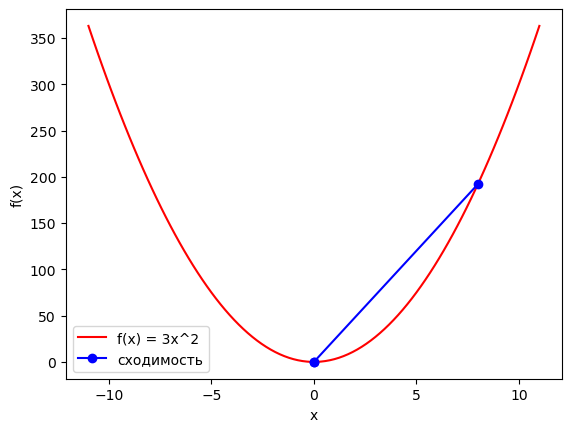

In [33]:
x = np.linspace(-11, 11, 100)
y = f(x)

plt.figure()
plt.plot(x, y, label='f(x) = 3x^2', color='r')
plt.plot(result_x, result_y, color='b', marker='o', label='сходимость')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()